## Problems

Conducting analysis on bio-signals
Identifying smoking patterns based on certain features: based on the provided data, such as age, gender, and health indicators
Assesing health indicators : Evaluate the impact of smoking on various health indicators, such as hemoglobin, gender, and age, to better understand its health consequences
Identinfying key health indicators affected when a person is a smoker

## Import library & load data

In [76]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install Jinja2  
# needed by dataframe.format
!pip install scipy 
# needed by kendall measurement

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/43.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/43.7 MB 9.6 MB/s eta 0:00:05
   - -------------------------------------- 1.1/43.7 MB 12.0 MB/s eta 0:00:04
   - -------------------------------------- 1.8/43.7 MB 12.9 MB/s eta 0:00:04
   -- ------------------------------------- 2.7/43.7 MB 14.2 MB/s eta 0:00:03
   --- ------------------------------------ 3.6/43.7 MB 16.3 MB/s eta 0:00:03
   ---- ----------------------------------- 4.5/43.7 MB 16.0 MB/s eta 0:00:03
   ----- ---------------------------------- 5.7/43.7 MB 18.1 MB/s eta 0:00:03
   ------ --------------------------------- 6.6/43.7 MB 18.3 MB/s eta 0:00:03
   ------- -------------------------------- 7.7/43.7 MB 18.8 MB/s eta 0:00:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [71]:
smoking = pd.read_csv("./data/smoking.csv")
df = smoking.drop("ID", axis = 1)

df.rename(
    columns = {"height(cm)" : "height_cm", "weight(kg)" : "weight_kg", "waist(cm)" : "waist_cm", 
               "eyesight(left)" : "eyesight_left", "eyesight(right)" : "eyesight_right", 
               "hearing(left)" : "hearing_left", "hearing(right)" : "hearing_right", 
               "fasting blood sugar" : "fasting_blood_sugar", "Cholesterol" : "cholesterol", 
               "HDL" : "hdl", "LDL" : "ldl", "Urine protein" : "urine_protein", "serum creatinine" : "serum_creatinine",
               "AST" : "ast", "ALT" : "alt", "Gtp" : "gtp", "dental caries" : "dental_caries"},
        inplace = True)

In [58]:
df.head(5)

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [59]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height_cm            55692 non-null  int64  
 3   weight_kg            55692 non-null  int64  
 4   waist_cm             55692 non-null  float64
 5   eyesight_left        55692 non-null  float64
 6   eyesight_right       55692 non-null  float64
 7   hearing_left         55692 non-null  float64
 8   hearing_right        55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting_blood_sugar  55692 non-null  float64
 12  cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  hdl                  55692 non-null  float64
 15  ldl                  55692 non-null 

In [60]:
print(df.apply(np.unique, axis=0))

gender                                                            [F, M]
age                    [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 7...
height_cm              [130, 135, 140, 145, 150, 155, 160, 165, 170, ...
weight_kg              [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 8...
waist_cm               [51.0, 53.0, 54.0, 55.0, 56.0, 56.2, 56.4, 56....
eyesight_left          [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, ...
eyesight_right         [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, ...
hearing_left                                                  [1.0, 2.0]
hearing_right                                                 [1.0, 2.0]
systolic               [71.0, 72.0, 74.0, 79.0, 80.0, 81.0, 82.0, 83....
relaxation             [40.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49....
fasting_blood_sugar    [46.0, 48.0, 51.0, 54.0, 55.0, 56.0, 57.0, 58....
cholesterol            [55.0, 72.0, 77.0, 84.0, 86.0, 87.0, 90.0, 91....
triglyceride           [8.0, 11.0, 15.0, 16.0, 19.0

From data befroe:
1.  there are totally 0 null values in the dataset. 
2.  Of the variables' data types, 18 are float, 5 are integer and 3 are object.
3.  All oral values are Y. So the variable oral can not help.

smoking          None
gender           None
urine_protein    None
dental_caries    None
tartar           None
dtype: object

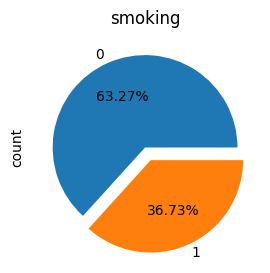

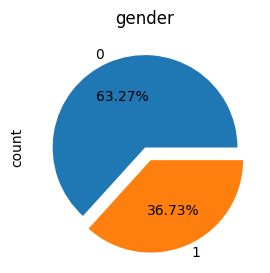

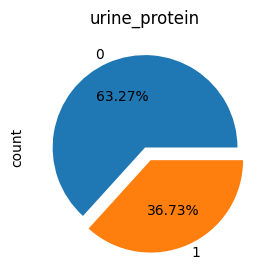

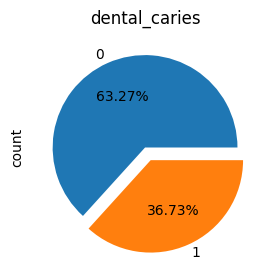

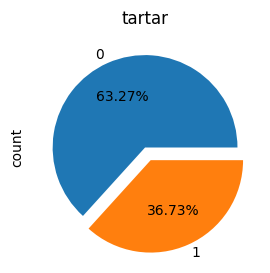

In [62]:
def pie_plt(data):
    plt.figure(figsize = [3, 3], clear = True)
    plt.title(data.name)
    df["smoking"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.2f%%')

df[['smoking', 'gender', 'urine_protein', 'dental_caries', 'tartar']].apply(pie_plt, axis=0)

## EDA

In [72]:
df = df.drop('oral', axis=1)
df['gender'] = df['gender'].map({'M':'1', 'F':0})
df['tartar'] = df['tartar'].map({'Y':'1', 'N':0})
df.head(3)

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1


In [115]:
corr_matrix = pd.DataFrame(df.corr().applymap('${:.2f}'.format))

In [116]:
df.corr()

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
gender,$1.00,$-0.29,$0.74,$0.57,$0.42,$0.13,$0.13,$-0.01,$-0.01,$0.17,...,$-0.04,$0.70,$0.02,$0.51,$0.10,$0.17,$0.24,$0.08,$0.06,$0.51
age,$-0.29,$1.00,$-0.48,$-0.32,$-0.03,$-0.20,$-0.19,$0.20,$0.21,$0.13,...,$0.04,$-0.26,$0.03,$-0.11,$0.03,$-0.06,$0.01,$-0.11,$-0.08,$-0.16
height_cm,$0.74,$-0.48,$1.00,$0.68,$0.38,$0.15,$0.16,$-0.08,$-0.08,$0.08,...,$-0.05,$0.54,$0.01,$0.38,$0.04,$0.13,$0.14,$0.08,$0.06,$0.40
weight_kg,$0.57,$-0.32,$0.68,$1.00,$0.82,$0.11,$0.11,$-0.05,$-0.05,$0.27,...,$0.04,$0.49,$0.03,$0.32,$0.12,$0.25,$0.21,$0.07,$0.06,$0.30
waist_cm,$0.42,$-0.03,$0.38,$0.82,$1.00,$0.03,$0.04,$0.02,$0.02,$0.32,...,$0.07,$0.39,$0.05,$0.24,$0.14,$0.25,$0.24,$0.04,$0.05,$0.23
eyesight_left,$0.13,$-0.20,$0.15,$0.11,$0.03,$1.00,$0.35,$-0.05,$-0.05,$-0.02,...,$-0.01,$0.10,$-0.00,$0.07,$-0.01,$0.02,$0.00,$0.00,$0.01,$0.06
eyesight_right,$0.13,$-0.19,$0.16,$0.11,$0.04,$0.35,$1.00,$-0.04,$-0.05,$-0.01,...,$-0.01,$0.10,$-0.01,$0.05,$-0.01,$0.02,$0.01,$0.02,$0.01,$0.06
hearing_left,$-0.01,$0.20,$-0.08,$-0.05,$0.02,$-0.05,$-0.04,$1.00,$0.51,$0.06,...,$-0.02,$-0.03,$0.01,$0.00,$0.02,$0.00,$0.01,$-0.02,$-0.04,$-0.02
hearing_right,$-0.01,$0.21,$-0.08,$-0.05,$0.02,$-0.05,$-0.05,$0.51,$1.00,$0.05,...,$-0.02,$-0.03,$0.02,$0.01,$0.01,$-0.01,$0.01,$-0.02,$-0.03,$-0.02
systolic,$0.17,$0.13,$0.08,$0.27,$0.32,$-0.02,$-0.01,$0.06,$0.05,$1.00,...,$0.02,$0.19,$0.05,$0.07,$0.08,$0.09,$0.17,$0.03,$0.01,$0.07


In [120]:
corr_matrix

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
gender,$1.00,$-0.29,$0.74,$0.57,$0.42,$0.13,$0.13,$-0.01,$-0.01,$0.17,...,$-0.04,$0.70,$0.02,$0.51,$0.10,$0.17,$0.24,$0.08,$0.06,$0.51
age,$-0.29,$1.00,$-0.48,$-0.32,$-0.03,$-0.20,$-0.19,$0.20,$0.21,$0.13,...,$0.04,$-0.26,$0.03,$-0.11,$0.03,$-0.06,$0.01,$-0.11,$-0.08,$-0.16
height_cm,$0.74,$-0.48,$1.00,$0.68,$0.38,$0.15,$0.16,$-0.08,$-0.08,$0.08,...,$-0.05,$0.54,$0.01,$0.38,$0.04,$0.13,$0.14,$0.08,$0.06,$0.40
weight_kg,$0.57,$-0.32,$0.68,$1.00,$0.82,$0.11,$0.11,$-0.05,$-0.05,$0.27,...,$0.04,$0.49,$0.03,$0.32,$0.12,$0.25,$0.21,$0.07,$0.06,$0.30
waist_cm,$0.42,$-0.03,$0.38,$0.82,$1.00,$0.03,$0.04,$0.02,$0.02,$0.32,...,$0.07,$0.39,$0.05,$0.24,$0.14,$0.25,$0.24,$0.04,$0.05,$0.23
eyesight_left,$0.13,$-0.20,$0.15,$0.11,$0.03,$1.00,$0.35,$-0.05,$-0.05,$-0.02,...,$-0.01,$0.10,$-0.00,$0.07,$-0.01,$0.02,$0.00,$0.00,$0.01,$0.06
eyesight_right,$0.13,$-0.19,$0.16,$0.11,$0.04,$0.35,$1.00,$-0.04,$-0.05,$-0.01,...,$-0.01,$0.10,$-0.01,$0.05,$-0.01,$0.02,$0.01,$0.02,$0.01,$0.06
hearing_left,$-0.01,$0.20,$-0.08,$-0.05,$0.02,$-0.05,$-0.04,$1.00,$0.51,$0.06,...,$-0.02,$-0.03,$0.01,$0.00,$0.02,$0.00,$0.01,$-0.02,$-0.04,$-0.02
hearing_right,$-0.01,$0.21,$-0.08,$-0.05,$0.02,$-0.05,$-0.05,$0.51,$1.00,$0.05,...,$-0.02,$-0.03,$0.02,$0.01,$0.01,$-0.01,$0.01,$-0.02,$-0.03,$-0.02
systolic,$0.17,$0.13,$0.08,$0.27,$0.32,$-0.02,$-0.01,$0.06,$0.05,$1.00,...,$0.02,$0.19,$0.05,$0.07,$0.08,$0.09,$0.17,$0.03,$0.01,$0.07


In [108]:
type(corr_matrix), type(df.corr())

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [114]:

df.corr().style.background_gradient(cmap = "Oranges") # Pearson, linear relationship

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
gender,1.000000,-0.290095,0.741556,0.574956,0.419568,0.127424,0.125680,-0.009407,-0.011579,0.167289,0.177891,0.098117,-0.085270,0.241520,-0.306728,-0.042525,0.702214,0.015907,0.507249,0.095718,0.167903,0.237270,0.084408,0.055473,0.510340
age,-0.290095,1.000000,-0.479528,-0.324706,-0.026297,-0.195472,-0.192723,0.203993,0.208722,0.134023,0.050745,0.182351,0.055557,0.015102,0.007047,0.043007,-0.263078,0.029625,-0.106118,0.032576,-0.063937,0.013031,-0.114984,-0.081796,-0.162557
height_cm,0.741556,-0.479528,1.000000,0.675656,0.378902,0.151133,0.155665,-0.078663,-0.078323,0.080585,0.113193,0.019619,-0.082161,0.156693,-0.213284,-0.048419,0.539367,0.005128,0.383883,0.041737,0.126511,0.139720,0.079331,0.055513,0.396675
weight_kg,0.574956,-0.324706,0.675656,1.000000,0.822842,0.108433,0.113155,-0.050094,-0.052836,0.266131,0.271634,0.136237,0.026403,0.324429,-0.358868,0.040560,0.492970,0.032566,0.324808,0.120130,0.250634,0.209625,0.073536,0.059921,0.302780
waist_cm,0.419568,-0.026297,0.378902,0.822842,1.000000,0.027458,0.037996,0.023790,0.019286,0.316922,0.292627,0.211132,0.065467,0.361922,-0.376203,0.072817,0.387066,0.045492,0.235024,0.142690,0.252478,0.243141,0.044203,0.046197,0.226259
eyesight_left,0.127424,-0.195472,0.151133,0.108433,0.027458,1.000000,0.354574,-0.046571,-0.048788,-0.019330,0.005199,-0.041851,-0.004985,0.019717,-0.015296,-0.007257,0.095234,-0.002752,0.071410,-0.007966,0.019326,0.003850,0.003684,0.012532,0.061204
eyesight_right,0.125680,-0.192723,0.155665,0.113155,0.037996,0.354574,1.000000,-0.043877,-0.046623,-0.013720,0.011357,-0.044006,-0.007851,0.019881,-0.022220,-0.006172,0.096119,-0.013511,0.047608,-0.006921,0.024182,0.012195,0.016359,0.006568,0.063017
hearing_left,-0.009407,0.203993,-0.078663,-0.050094,0.023790,-0.046571,-0.043877,1.000000,0.510095,0.055219,0.008754,0.042314,-0.023276,0.004750,-0.020159,-0.016706,-0.026116,0.014527,0.003349,0.018074,0.004820,0.012864,-0.016100,-0.035396,-0.023209
hearing_right,-0.011579,0.208722,-0.078323,-0.052836,0.019286,-0.048788,-0.046623,0.510095,1.000000,0.049095,0.001651,0.041339,-0.023058,0.000267,-0.017986,-0.015426,-0.030943,0.019461,0.008060,0.009393,-0.005081,0.009245,-0.016376,-0.026698,-0.018855
systolic,0.167289,0.134023,0.080585,0.266131,0.316922,-0.019330,-0.013720,0.055219,0.049095,1.000000,0.761051,0.172700,0.059572,0.198826,-0.088487,0.016569,0.186514,0.046170,0.072288,0.083204,0.094893,0.165724,0.029894,0.006542,0.073109


In [77]:
df.corr('kendall').style.background_gradient(cmap = "Oranges")

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
gender,1.000000,-0.276303,0.656856,0.525856,0.351668,0.160408,0.165583,-0.009407,-0.011579,0.143678,0.149412,0.100624,-0.065618,0.212280,-0.265449,-0.038993,0.604402,0.017370,0.533303,0.158134,0.306946,0.374153,0.084408,0.055473,0.510340
age,-0.276303,1.000000,-0.383424,-0.250972,-0.026383,-0.260432,-0.256957,0.152679,0.156010,0.079600,0.037125,0.150576,0.053088,0.019333,0.013549,0.045155,-0.221117,0.010643,-0.134742,0.083499,-0.050280,-0.014742,-0.105649,-0.067968,-0.142369
height_cm,0.656856,-0.383424,1.000000,0.560977,0.283367,0.185343,0.189379,-0.065057,-0.064735,0.069994,0.086948,0.023612,-0.055842,0.120430,-0.165112,-0.036276,0.421617,0.008312,0.364703,0.054508,0.192638,0.211564,0.071094,0.049144,0.352355
weight_kg,0.525856,-0.250972,0.560977,1.000000,0.652364,0.132126,0.134103,-0.042460,-0.045972,0.195229,0.194229,0.128353,0.019355,0.250332,-0.274562,0.041720,0.393518,0.021828,0.318551,0.142376,0.331080,0.318912,0.061547,0.050037,0.272734
waist_cm,0.351668,-0.026383,0.283367,0.652364,1.000000,0.026492,0.029453,0.022223,0.017249,0.220751,0.200508,0.178182,0.049931,0.274971,-0.273572,0.067156,0.277947,0.027832,0.206916,0.174858,0.325075,0.327569,0.034401,0.036747,0.187798
eyesight_left,0.160408,-0.260432,0.185343,0.132126,0.026492,1.000000,0.584455,-0.079731,-0.085402,-0.027947,0.003474,-0.044089,-0.003514,0.014744,-0.013768,-0.003051,0.114698,-0.012255,0.081162,-0.020205,0.039103,0.029449,0.014893,0.018127,0.081824
eyesight_right,0.165583,-0.256957,0.189379,0.134103,0.029453,0.584455,1.000000,-0.078634,-0.086836,-0.024816,0.005416,-0.044070,-0.003386,0.015009,-0.017624,-0.002167,0.117908,-0.012280,0.081106,-0.018610,0.042924,0.031365,0.021459,0.014566,0.089404
hearing_left,-0.009407,0.152679,-0.065057,-0.042460,0.022223,-0.079731,-0.078634,1.000000,0.510095,0.042942,0.005164,0.034738,-0.018487,0.005087,-0.016880,-0.014137,-0.026889,0.011125,-0.000030,0.030805,-0.009096,0.007726,-0.016100,-0.035396,-0.023209
hearing_right,-0.011579,0.156010,-0.064735,-0.045972,0.017249,-0.085402,-0.086836,0.510095,1.000000,0.037622,0.000577,0.037331,-0.016509,0.001418,-0.014324,-0.011934,-0.031970,0.016029,0.003034,0.031571,-0.012581,0.008916,-0.016376,-0.026698,-0.018855
systolic,0.143678,0.079600,0.069994,0.195229,0.220751,-0.027947,-0.024816,0.042942,0.037622,1.000000,0.569553,0.154674,0.038627,0.148458,-0.069525,0.015532,0.132342,0.022427,0.056484,0.120258,0.143529,0.181774,0.023634,0.003935,0.063933


From 